In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#importing libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as img
import cv2
import itertools
import pathlib
import warnings
from PIL import Image
from random import randint
warnings.filterwarnings('ignore')

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef as MCC
from sklearn.metrics import balanced_accuracy_score as BAS
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow import keras
from keras import layers
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.utils.vis_utils import plot_model
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG
from tensorflow.keras.layers import SeparableConv2D, BatchNormalization, GlobalAveragePooling2D

from distutils.dir_util import copy_tree, remove_tree

import os
print(os.listdir("/content/drive/MyDrive/Colab Notebooks/Dataset_2"))

['Mild_Demented', 'Moderate_Demented', 'Very_Mild_Demented']


In [ ]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders
splitfolders.ratio('/content/drive/MyDrive/Colab Notebooks/Dataset', output="output-2", seed=1345, ratio=(.6, 0.2,0.2))

Copying files: 5574 files [01:15, 73.65 files/s] 


In [ ]:
IMG_HEIGHT = 128
IMG_WIDTH = 128
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output-2/train",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size= 256
)

Found 3343 files belonging to 4 classes.


In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output-2/test",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size= 256
)

Found 1118 files belonging to 4 classes.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output-2/val",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size= 256
)

Found 1113 files belonging to 4 classes.


In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)))
model.add(keras.layers.Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Dropout(0.20))

model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation="relu",kernel_initializer="he_normal"))
model.add(keras.layers.Dense(64,"relu"))
model.add(keras.layers.Dense(4,"softmax"))

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "Adam",metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 32, 32, 32)       

In [ ]:
hist = model.fit(train_ds,validation_data=val_ds,epochs=100, batch_size=256, verbose=1)

Epoch 1/100
21/21 [==============================] - 90s 4s/step - loss: 2.2935 - accuracy: 0.4327 - val_loss: 1.2321 - val_accuracy: 0.4863
Epoch 2/100
21/21 [==============================] - 77s 4s/step - loss: 1.1289 - accuracy: 0.4856 - val_loss: 1.1267 - val_accuracy: 0.4863
Epoch 3/100
21/21 [==============================] - 80s 4s/step - loss: 1.0845 - accuracy: 0.4860 - val_loss: 1.0721 - val_accuracy: 0.5091
Epoch 4/100
21/21 [==============================] - 80s 4s/step - loss: 1.0282 - accuracy: 0.5157 - val_loss: 0.9926 - val_accuracy: 0.5289
Epoch 5/100
21/21 [==============================] - 84s 4s/step - loss: 0.9540 - accuracy: 0.5400 - val_loss: 0.8999 - val_accuracy: 0.5836
Epoch 6/100
21/21 [==============================] - 82s 4s/step - loss: 0.8837 - accuracy: 0.5781 - val_loss: 0.8461 - val_accuracy: 0.6231
Epoch 7/100
21/21 [==============================] - 80s 4s/step - loss: 0.8531 - accuracy: 0.5969 - val_loss: 0.8108 - val_accuracy: 0.6505
Epoch 8/100
2

In [ ]:
get_ac = hist.history['accuracy']
get_los = hist.history['loss']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']

In [ ]:
epochs = range(len(get_ac))
plt.plot(epochs, get_ac, 'b', label='Accuracy of Training data')
plt.plot(epochs, get_los, 'r', label='Loss of Training data')
plt.title('Training data accuracy and loss')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_ac, 'b', label='Accuracy of Training Data')
plt.plot(epochs, val_acc, 'r', label='Accuracy of Validation Data')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_los, 'b', label='Loss of Training Data')
plt.plot(epochs, val_loss, 'r', label='Loss of Validation Data')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

NameError: ignored

In [ ]:
loss, accuracy = model.evaluate(test_ds)

3/3 [==============================] - 5s 1s/step - loss: 0.0229 - accuracy: 0.9940


In [ ]:
model.save('/content/drive/MyDrive/Trained_models/my_model_2_aug')

In [ ]:
#loading saved model
new_model = tf.keras.models.load_model('/content/drive/MyDrive/Trained_models/my_model_2_aug')

# Check its architecture
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 32, 32, 32)       

In [ ]:
class_names = train_ds.class_names
print(class_names)

['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']


1/1 [==============================] - 0s 33ms/step


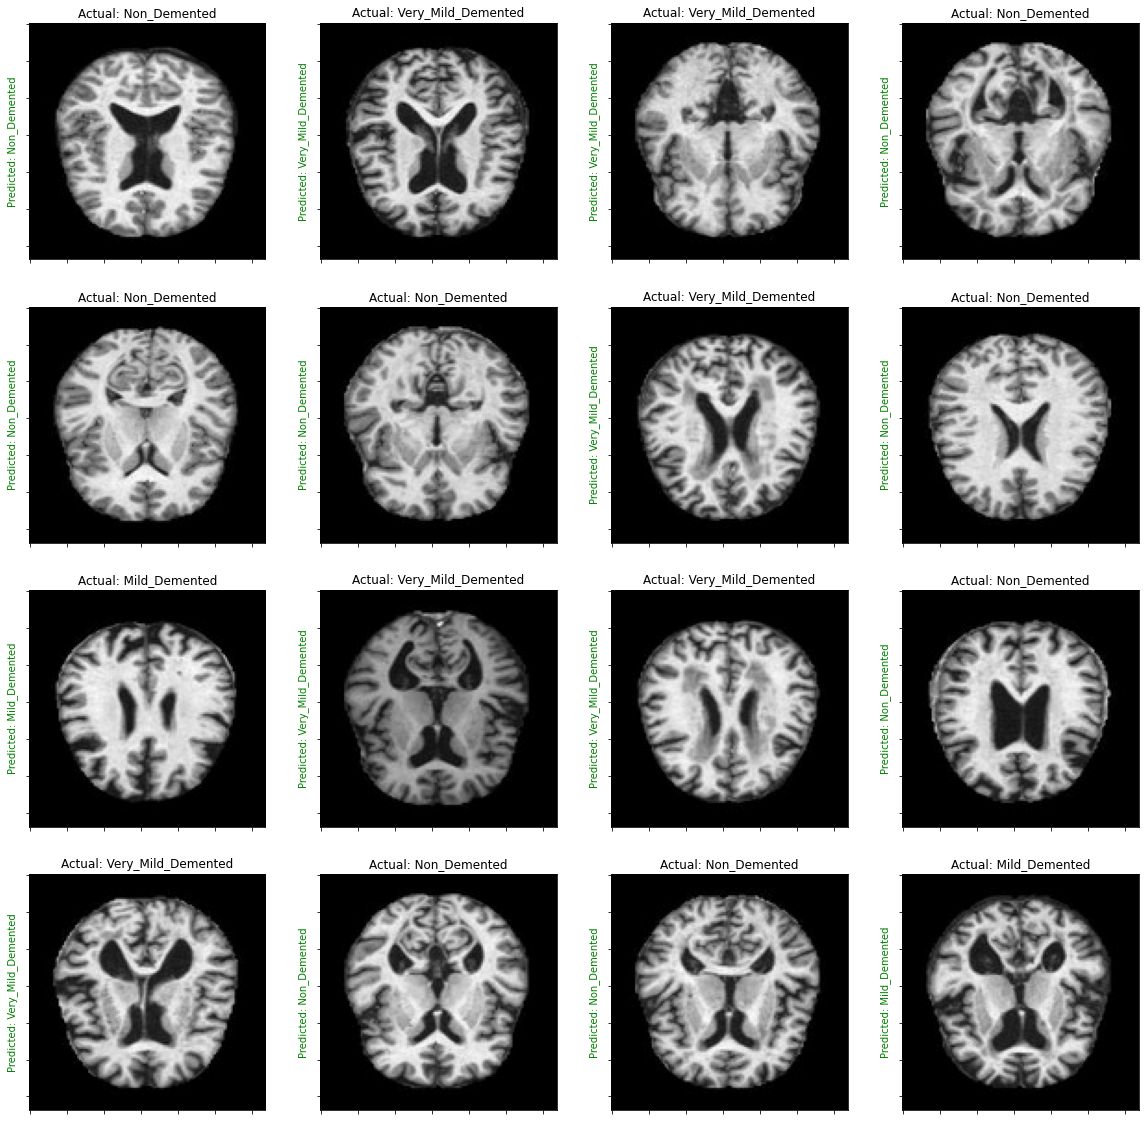

In [ ]:
plt.figure(figsize=(20, 20))
for images, labels in test_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predictions = model.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        if(class_names[labels[i]]==class_names[np.argmax(score)]):
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'green'})
            
        else:
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'red'})
        plt.gca().axes.yaxis.set_ticklabels([])        
        plt.gca().axes.xaxis.set_ticklabels([])

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

In [ ]:
#loading saved model
model = tf.keras.models.load_model('/content/drive/MyDrive/Trained_models/my_model_2_aug')

# Check its architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 32, 32, 32)       

In [ ]:
class_names = test_ds.class_names
y_true = []
pred = []
for images, labels in test_ds.take(1):
    for i in range(254):
        predictions = model.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        pred.append(np.argmax(score))
        y_true.append(class_names.index(class_names[labels[i]]))
print(class_names)

1/1 [==============================] - 0s 31ms/step
['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']


In [ ]:
cm = confusion_matrix(y_true, pred)
print(cm)

[[ 43   0   0   0]
 [  0   3   0   0]
 [  0   0 141   2]
 [  0   0   0  65]]


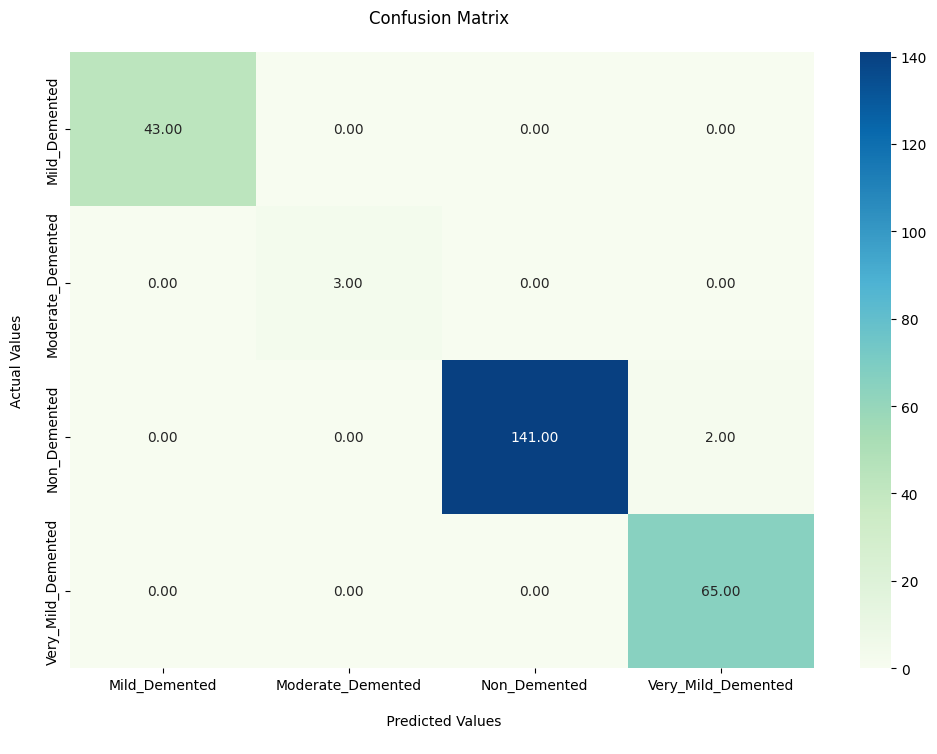

In [ ]:
plt.figure(figsize=(12,8))
fx=sns.heatmap(confusion_matrix(y_true,pred), annot=True,fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented'])
fx.yaxis.set_ticklabels(['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented'])
plt.show()

In [ ]:
print(classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00         3
           2       1.00      0.99      0.99       143
           3       0.97      1.00      0.98        65

    accuracy                           0.99       254
   macro avg       0.99      1.00      0.99       254
weighted avg       0.99      0.99      0.99       254

